In [7]:
#checking  for missing values
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data= pd.read_csv(r"/content/TASK-ML-INTERN.csv")
print("Dataset Info:")
print(data.info())
missing_values = data.isna().sum()
print("\nMissing values per column:")
missing_values#no missing value found.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None

Missing values per column:


,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [8]:
#standardize the data
from sklearn.preprocessing import StandardScaler
import pandas as pd
features = data.drop(columns=["vomitoxin_ppb","hsi_id"])#remove the columns which need to be decomposed

# Standardize the input before decomposing
scaler1 = StandardScaler()
scaled_features = scaler1.fit_transform(features)  # ✅ Standardization Applied
df_standardized = pd.DataFrame(scaled_features, columns=features.columns)
df_standardized

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,-0.602959,-0.965751,-0.543093,-1.157165,-0.742877,-1.052805,-1.138474,-1.291257,-1.128080,-0.647413,...,-1.136301,-0.579796,-0.435043,-0.472136,-0.641236,-0.807712,-0.858033,-0.499055,-0.738140,-0.619071
1,-0.611562,-0.831331,-0.683547,-0.654183,-0.480564,-0.510221,-0.678841,-0.826155,-0.462121,-0.691024,...,-0.754022,-1.071488,-0.811826,-0.715506,-0.814737,-0.726845,-1.145151,-0.766827,-0.759125,-0.904192
2,-1.210868,-1.529537,-1.328061,-1.135296,-1.277202,-1.403752,-1.618288,-1.577331,-1.492895,-1.516409,...,-1.311275,-1.089395,-1.333533,-1.437541,-1.186149,-1.183869,-1.546059,-1.470599,-1.231647,-1.344393
3,0.575693,0.714559,0.637270,0.721659,0.940964,1.060639,1.176304,0.638522,0.488863,0.540156,...,-0.256030,0.028574,-0.186753,-0.068313,-0.181179,0.216860,-0.004504,0.076859,0.315411,-0.085268
4,0.900614,1.022832,0.772988,1.336847,0.992857,0.866564,1.177082,0.936845,0.737234,0.940551,...,0.677745,0.542282,0.600180,0.390096,0.442627,0.423396,0.098487,0.689182,0.422178,0.256052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.783938,0.071957,0.181683,0.246627,0.213439,0.018041,0.267283,0.470473,0.441400,0.305277,...,-0.016046,0.123585,-0.191706,-0.436956,-0.008592,-0.281142,-0.340894,0.043130,0.046548,-0.299783
496,-0.755495,-1.007581,-1.171925,-1.103399,-1.606453,-1.293157,-1.004847,-1.299862,-0.960701,-1.431361,...,-1.848498,-1.329392,-1.524444,-1.467160,-1.517093,-1.789060,-1.722953,-1.510748,-1.680774,-1.684417
497,0.971661,1.332856,1.451540,1.782074,1.552487,1.004400,1.269080,1.443253,1.114482,1.107576,...,0.783383,0.866190,0.736917,0.519024,0.590407,0.581464,0.424406,0.593323,0.475675,1.089327
498,0.480749,1.276771,1.208778,0.592281,1.513373,1.108214,1.254474,1.087312,1.327835,0.864912,...,0.115535,-0.034126,0.352402,0.216864,0.413197,0.397900,-0.155133,0.282563,0.222267,0.337065


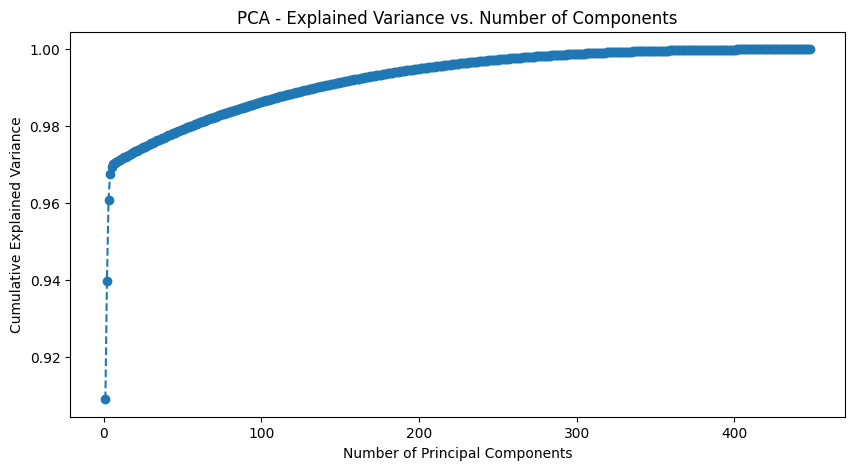

✅ Optimal Number of Components: 3


,PC1,PC2,PC3,target
0,-0.891991,0.053557,0.133183,1100.0
1,-0.883268,0.066940,0.064646,1000.0
2,-1.668921,-0.191009,-0.301850,1300.0
3,0.232399,0.049476,0.147047,1300.0
4,0.780556,-0.030109,-0.081935,220.0
...,...,...,...,...
495,-0.053070,-0.094936,-0.059125,1200.0
496,-1.640261,-0.029063,0.132065,0.0
497,1.120416,-0.074148,0.067021,0.0
498,0.459695,0.042904,0.087229,0.0


In [9]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 🔹 Step 1: Apply PCA (Keep All Components Initially)
pca = PCA(n_components=features.shape[1])
pca.fit(features)

# 🔹 Step 2: Explained Variance Analysis
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.show()

# choose the optimal number of features so that 95 percent variance is covered
n_components = sum(explained_variance < 0.95) + 1
print(f"✅ Optimal Number of Components: {n_components}")
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(features)

df_pca = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(n_components)])
df_pca['target']=data['vomitoxin_ppb']
df_pca

In [10]:
import joblib
#Saving the standard scaler and pca model
save_path = "/content/"

joblib.dump(scaler1, save_path + "scaler.pkl")

joblib.dump(pca, save_path + "pca.pkl")

print("✅ Scaler and PCA saved successfully!")




✅ Scaler and PCA saved successfully!


In [11]:
df_pca['PC3'].skew()#sincew pc3 is left skewed we have 2 options either we drop pc3 since pc1 and 2 explain 94 percent of variance or we choose other method apart from z score


-1.3509887698375456

In [13]:
#could be used to explain how much percentage of variance is explained by the particular component
# Create a DataFrame to display variance explained by each component
df_variance = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Explained Variance Ratio": pca.explained_variance_ratio_
})

print("🔹 Variance Explained by Top Principal Components:")
print(df_variance.head(10))



🔹 Variance Explained by Top Principal Components:
  Principal Component  Explained Variance Ratio
0                 PC1                  0.908912
1                 PC2                  0.030893
2                 PC3                  0.021082


In [14]:
from scipy.stats import zscore#since pc1 and pc2 are normally distributed so we apply z score to them while in case of pc3 we apply iqr
import numpy as np

# Compute Z-scores for PC1 and PC2
df_pca["Outlier_ZScore"] = (abs(zscore(df_pca[['PC1', 'PC2']])) > 3).any(axis=1)

# Compute IQR for PC3
Q1 = df_pca["PC3"].quantile(0.25)
Q3 = df_pca["PC3"].quantile(0.75)
IQR = Q3 - Q1

# Define IQR outlier threshold (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_pca["Outlier_IQR"] = (df_pca["PC3"] < lower_bound) | (df_pca["PC3"] > upper_bound)

# Combine results: if an outlier is detected in either method, mark the row as an outlier
df_pca["Final_Outlier"] = df_pca[["Outlier_ZScore", "Outlier_IQR"]].any(axis=1)

print(f"🔹 Total Outliers Detected: {df_pca['Final_Outlier'].sum()}")


🔹 Total Outliers Detected: 32


In [15]:
from sklearn.cluster import DBSCAN
import numpy as np
#using DBscan method with hyperparameter to detect the outlier
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    return clusters  # Returns cluster labels (-1 means outlier)

# Select PCA-reduced data (exclude target column)
X_pca = df_pca.drop(columns=["target"])

# Define hyperparameter search space
eps_values = np.arange(0.5, 3.0, 0.2)  # Try epsilon values from 0.5 to 3.0
min_samples_values = [3, 5, 10]  # Try different min_samples

best_eps = None
best_min_samples = None
best_outliers = None

# 🔹 Grid search over hyperparameters
for eps in eps_values:
    for min_samples in min_samples_values:
        clusters = apply_dbscan(X_pca, eps=eps, min_samples=min_samples)
        num_outliers = sum(clusters == -1)
        print(f"DBSCAN (eps={eps}, min_samples={min_samples}): Outliers = {num_outliers}")

        # Store the best setting (lowest outliers but not 0)
        if best_outliers is None or (num_outliers < best_outliers and num_outliers > 0):
            best_eps = eps
            best_min_samples = min_samples
            best_outliers = num_outliers

# Print best hyperparameters
print(f"✅ Best Hyperparameters: eps={best_eps}, min_samples={best_min_samples}, Outliers={best_outliers}")


DBSCAN (eps=0.5, min_samples=3): Outliers = 22
DBSCAN (eps=0.5, min_samples=5): Outliers = 25
DBSCAN (eps=0.5, min_samples=10): Outliers = 40
DBSCAN (eps=0.7, min_samples=3): Outliers = 17
DBSCAN (eps=0.7, min_samples=5): Outliers = 22
DBSCAN (eps=0.7, min_samples=10): Outliers = 36
DBSCAN (eps=0.8999999999999999, min_samples=3): Outliers = 9
DBSCAN (eps=0.8999999999999999, min_samples=5): Outliers = 15
DBSCAN (eps=0.8999999999999999, min_samples=10): Outliers = 21
DBSCAN (eps=1.0999999999999999, min_samples=3): Outliers = 3
DBSCAN (eps=1.0999999999999999, min_samples=5): Outliers = 12
DBSCAN (eps=1.0999999999999999, min_samples=10): Outliers = 18
DBSCAN (eps=1.2999999999999998, min_samples=3): Outliers = 3
DBSCAN (eps=1.2999999999999998, min_samples=5): Outliers = 5
DBSCAN (eps=1.2999999999999998, min_samples=10): Outliers = 12
DBSCAN (eps=1.4999999999999998, min_samples=3): Outliers = 3
DBSCAN (eps=1.4999999999999998, min_samples=5): Outliers = 3
DBSCAN (eps=1.4999999999999998, min_s

In [16]:
df_pca#since dbscan didnt contribute much to outliers so we ignored it

,PC1,PC2,PC3,target,Outlier_ZScore,Outlier_IQR,Final_Outlier
0,-0.891991,0.053557,0.133183,1100.0,False,False,False
1,-0.883268,0.066940,0.064646,1000.0,False,False,False
2,-1.668921,-0.191009,-0.301850,1300.0,False,False,False
3,0.232399,0.049476,0.147047,1300.0,False,False,False
4,0.780556,-0.030109,-0.081935,220.0,False,False,False
...,...,...,...,...,...,...,...
495,-0.053070,-0.094936,-0.059125,1200.0,False,False,False
496,-1.640261,-0.029063,0.132065,0.0,False,False,False
497,1.120416,-0.074148,0.067021,0.0,False,False,False
498,0.459695,0.042904,0.087229,0.0,False,False,False


In [17]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level
df_pca["Outlier_IForest"] = iso_forest.fit_predict(df_pca.drop(columns=["target", "Outlier_ZScore"]))

df_pca["Outlier_IForest"] = df_pca["Outlier_IForest"] == -1

# Print number of Isolation Forest outliers
print(f"🔹 Number of outliers detected using Isolation Forest: {df_pca['Outlier_IForest'].sum()}")


🔹 Number of outliers detected using Isolation Forest: 25


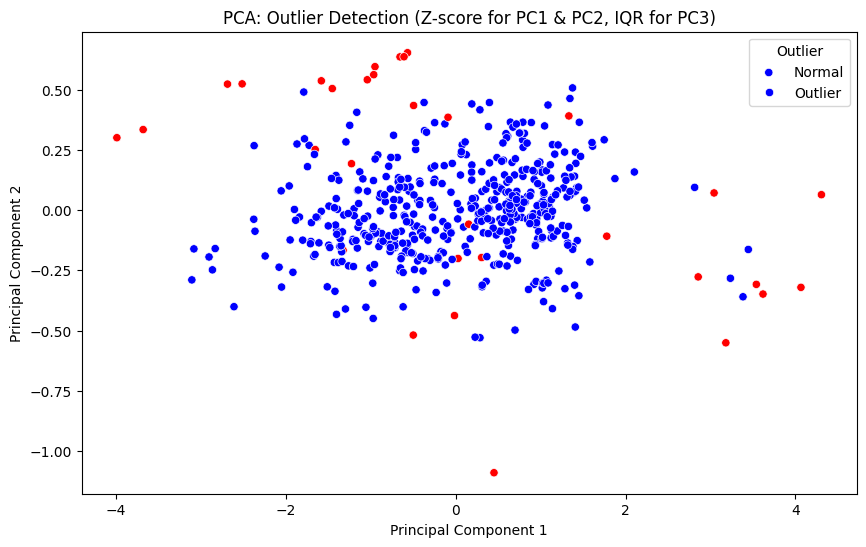

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot with outliers detected by z score and IQR test
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Final_Outlier"], palette={True: "red", False: "blue"})

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Outlier Detection (Z-score for PC1 & PC2, IQR for PC3)")
plt.legend(title="Outlier", labels=["Normal", "Outlier"])
plt.show()


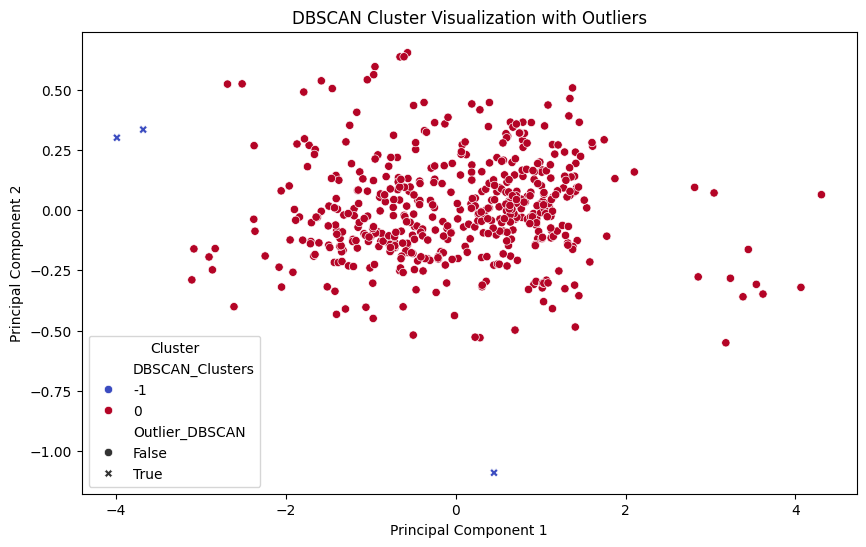

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply DBSCAN with best hyperparameters
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Add cluster labels to DataFrame
df_pca["DBSCAN_Clusters"] = clusters
df_pca["Outlier_DBSCAN"] = clusters == -1  # Mark outliers

# Scatter plot of clusters for dbscan outliers visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["DBSCAN_Clusters"], palette="coolwarm", style=df_pca["Outlier_DBSCAN"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Cluster Visualization with Outliers")
plt.legend(title="Cluster")
plt.show()


In [70]:
df_pca["Final_Outlier"] = df_pca[["Outlier_ZScore", "Outlier_IQR", "Outlier_DBSCAN", "Outlier_IForest"]].any(axis=1)#combining all 3 outliers information
print(f"🔹 Total Outliers Detected: {df_pca['Final_Outlier'].sum()}")


🔹 Total Outliers Detected: 32


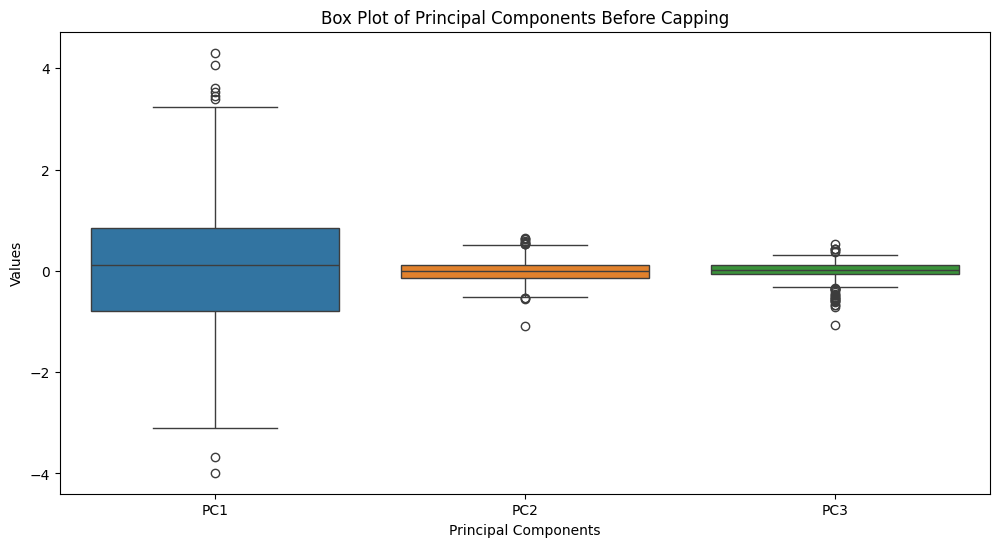

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create box plots
sns.boxplot(data=df_pca[["PC1", "PC2", "PC3"]])#visualizing the outliers through the boxplot

# Title and labels
plt.title("Box Plot of Principal Components Before Capping")
plt.xlabel("Principal Components")
plt.ylabel("Values")

# Show the plot
plt.show()


In [23]:
def cap_percentile(df, col):
    lower_bound = df[col].quantile(0.05)  # 5th percentile
    upper_bound = df[col].quantile(0.95)  # 95th percentile
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Any feature which is above 95 percentile or below 5 percentile shall be capped(ie given fixed value)
#since pc1 and pc2 are almost normal so above method will work on them
# Apply to PC1 and PC2
cap_percentile(df_pca, "PC1")
cap_percentile(df_pca, "PC2")
def cap_iqr(df, col):
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Cap values

# Apply to PC3
cap_iqr(df_pca, "PC3")#since pc3 is skewed so capping through iqr method will be better


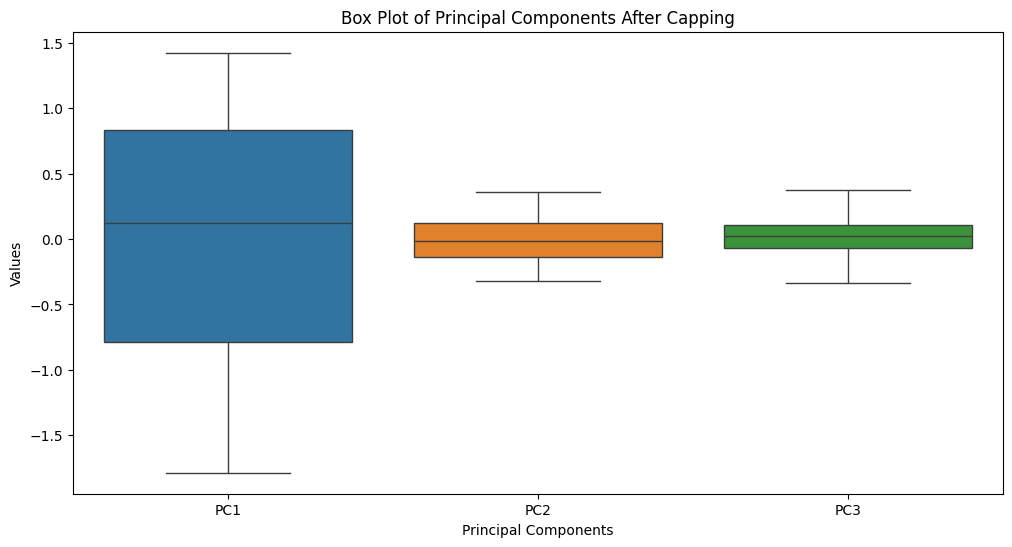

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pca[["PC1", "PC2", "PC3"]])#after capping we observe that their no outliers

plt.title("Box Plot of Principal Components After Capping")
plt.xlabel("Principal Components")
plt.ylabel("Values")

plt.show()


<Axes: >

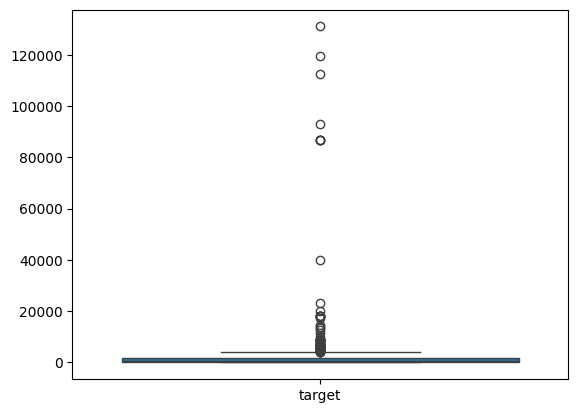

In [25]:
sns.boxplot(data=df_pca[['target']])#target is heavily skewed

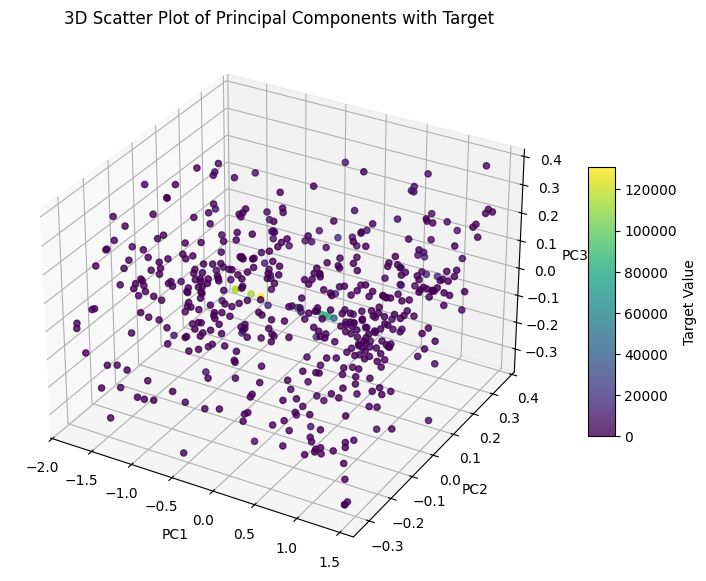

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))#visualizing pc1 pc2 pc3 on target variable through scatter plot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on target variable
sc = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['target'], cmap='viridis', alpha=0.8)

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Principal Components with Target')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Target Value')

plt.show()


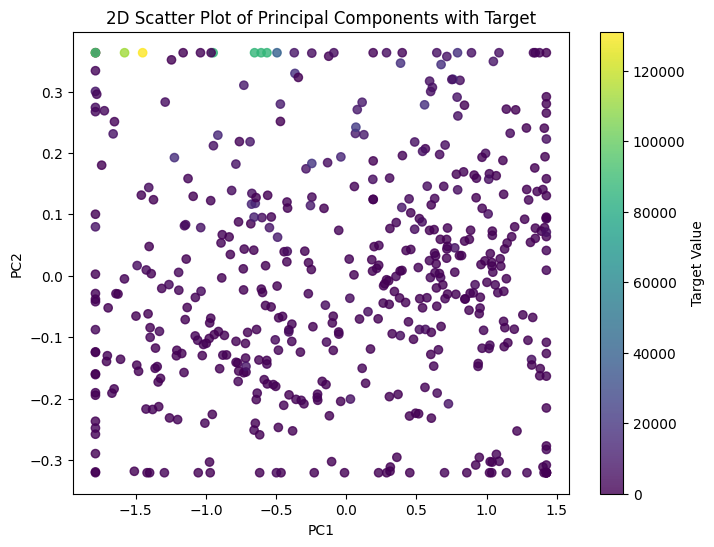

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8,6))#2d scatter plot
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis', alpha=0.8)

# Color bar
plt.colorbar(scatter, label='Target Value')

# Labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Scatter Plot of Principal Components with Target')

plt.show()


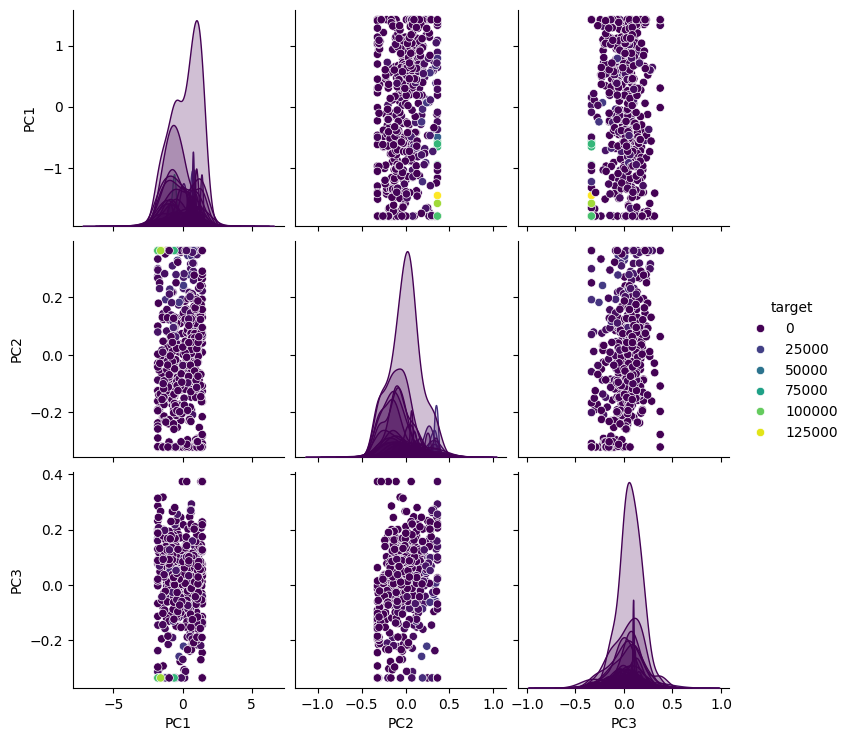

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of PC1, PC2, PC3 with hue as target
sns.pairplot(df_pca, vars=['PC1', 'PC2', 'PC3'], hue='target', palette='viridis')

# Show plot
plt.show()


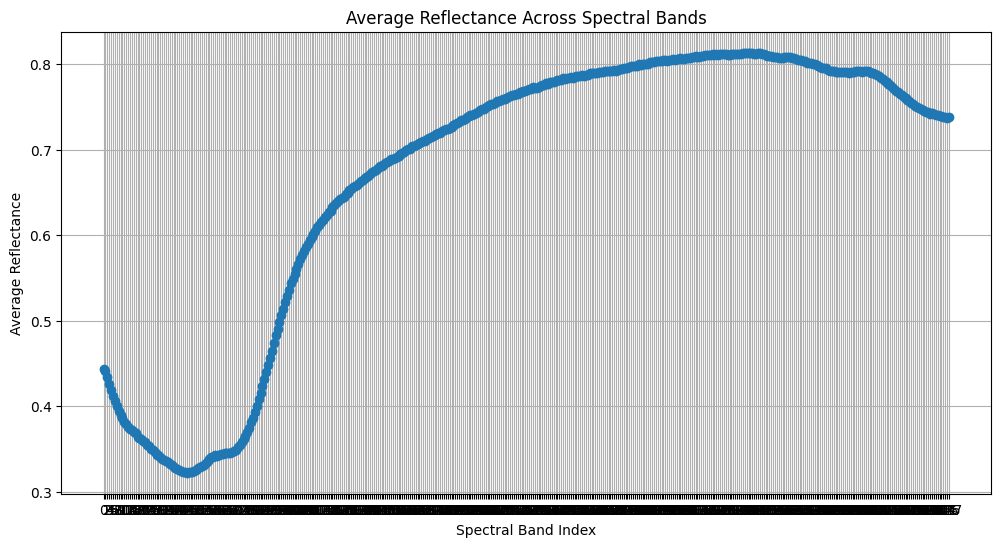

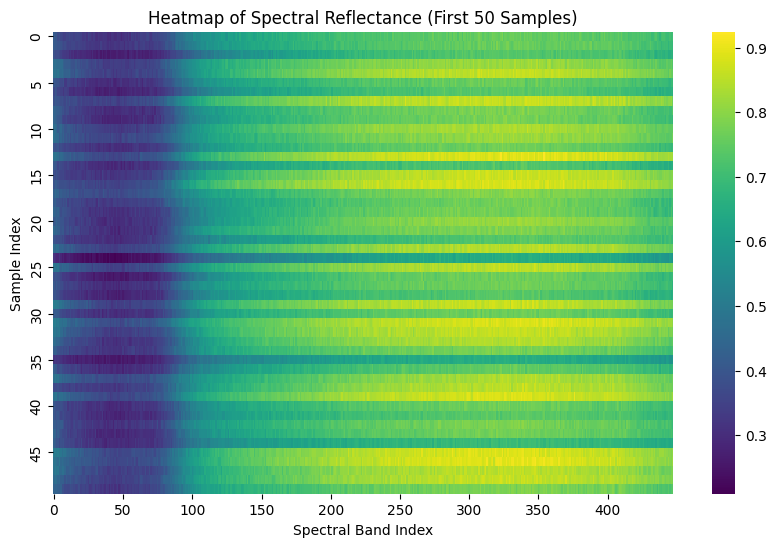

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Visualize spectral bands (e.g., line plots for average reflectance, heatmaps for sample comparison
file_path = r"/content/TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

# Extract spectral data (excluding the first and last columns)
spectral_data = df.iloc[:, 1:-1]

# Compute the average reflectance per spectral band
avg_reflectance = spectral_data.mean(axis=0)

# Plot the average reflectance across spectral bands
plt.figure(figsize=(12, 6))
plt.plot(avg_reflectance.index, avg_reflectance.values, marker='o', linestyle='-')
plt.xlabel("Spectral Band Index")
plt.ylabel("Average Reflectance")
plt.title("Average Reflectance Across Spectral Bands")
plt.grid(True)
plt.show()

# Heatmap of reflectance for a subset of samples
plt.figure(figsize=(10, 6))
sns.heatmap(spectral_data.iloc[:50, :].values, cmap="viridis", xticklabels=50, yticklabels=5)
plt.xlabel("Spectral Band Index")
plt.ylabel("Sample Index")
plt.title("Heatmap of Spectral Reflectance (First 50 Samples)")
plt.show()


In [30]:
df_pca

,PC1,PC2,PC3,target,Outlier_ZScore,Outlier_IQR,Final_Outlier,Outlier_IForest,DBSCAN_Clusters,Outlier_DBSCAN
0,-0.891991,0.053557,0.133183,1100.0,False,False,False,False,0,False
1,-0.883268,0.066940,0.064646,1000.0,False,False,False,False,0,False
2,-1.668921,-0.191009,-0.301850,1300.0,False,False,False,False,0,False
3,0.232399,0.049476,0.147047,1300.0,False,False,False,False,0,False
4,0.780556,-0.030109,-0.081935,220.0,False,False,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...
495,-0.053070,-0.094936,-0.059125,1200.0,False,False,False,False,0,False
496,-1.640261,-0.029063,0.132065,0.0,False,False,False,False,0,False
497,1.120416,-0.074148,0.067021,0.0,False,False,False,False,0,False
498,0.459695,0.042904,0.087229,0.0,False,False,False,False,0,False


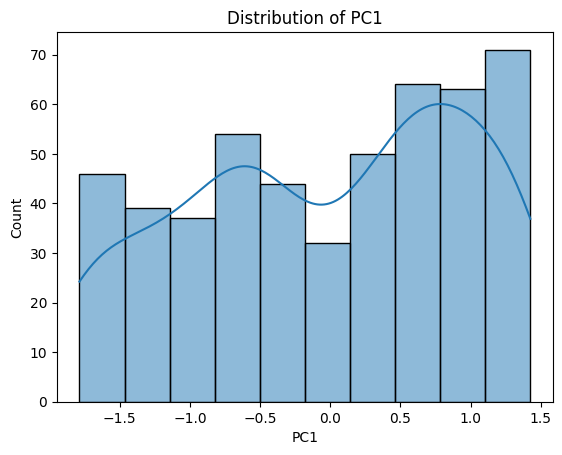

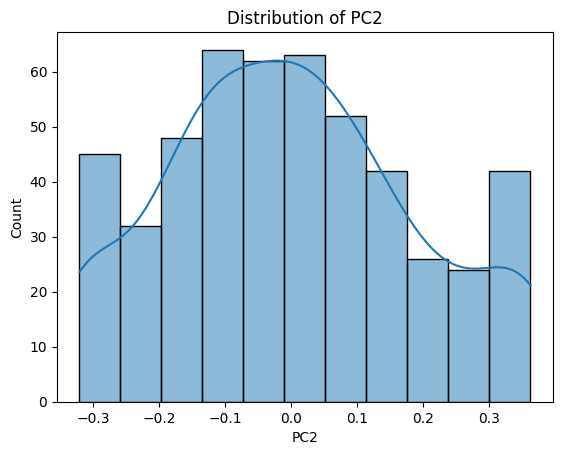

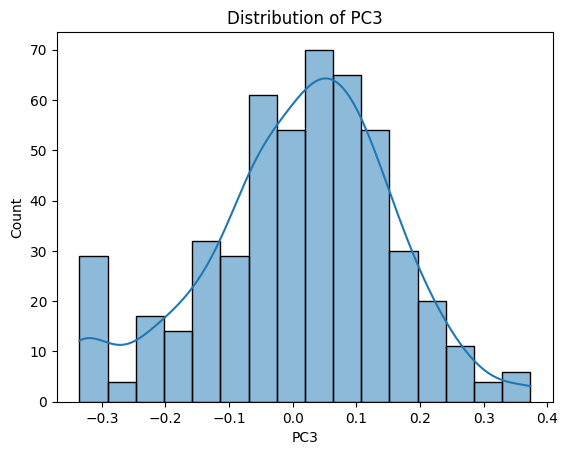

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt

for pc in ["PC1", "PC2", "PC3"]:#checking if pc1 pc2 pc3 are normal distribution or not indeed they are almost normal we do not need to further process them
    sns.histplot(df_pca[pc], kde=True)
    plt.title(f"Distribution of {pc}")
    plt.show()


In [ ]:
df_comparison = pd.DataFrame({
    "Actual": y_test_original.flatten(),  #compare the predicted and actual output in dataframe form
    "Predicted": y_pred_original.flatten()
})
df_comparison

In [34]:
#we are using LSTM(since previous and current are more or less  independent of each other so LSTM might not be the best model which is even visible from r2 score maximum r2 score achieved was 54 percent)
import numpy as np
import pandas as pd
import keras_tuner as kt
import shutil
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def preprocess_data(df_pca):
    df_pca["target_log"] = np.log1p(df_pca["target"])#target is highly skewed so apply log transformation

    lower_bound = df_pca["target_log"].quantile(0.01)#even after log transformation their are some outliers which needs to be capped . Any data above 99 percentile is capped and below 1 percentile is capped
    upper_bound = df_pca["target_log"].quantile(0.99)
    df_pca["target_capped"] = np.clip(df_pca["target_log"], lower_bound, upper_bound)


    if df_pca["target_capped"].min() < 0:#fixing the negative value since during inverse log transform negative values are difficult to be recovered
        shift_value = abs(df_pca["target_capped"].min()) + 1e-6
        df_pca["target_capped"] += shift_value


    scaler = MinMaxScaler()#standardize the target variable
    df_pca["target_scaled"] = scaler.fit_transform(df_pca["target_capped"].values.reshape(-1, 1))#ready for prediction

   #choose x and y for prediction
    X = df_pca[['PC1', 'PC2', 'PC3']]
    y = df_pca["target_scaled"]

    # Normalize Features
    feature_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X)

    # Reshape for LSTM (samples, timesteps, features)
    X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

    return train_test_split(X_reshaped, y, test_size=0.2, random_state=42), scaler

# Prepare data
(df_pca_train, df_pca_test, y_train, y_test), scaler = preprocess_data(df_pca)

# Define the model function for hyperparameter tuning
def build_model(hp):
    model = Sequential()

    model.add(LSTM(
        units=hp.Int("lstm_units1", min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(df_pca_train.shape[1], df_pca_train.shape[2])
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float("dropout1", min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int("lstm_units2", min_value=16, max_value=64, step=16),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float("dropout2", min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(hp.Int("dense_units", min_value=8, max_value=32, step=8), activation='relu'))
    model.add(Dense(1, activation='linear'))  # Regression output

    model.compile(
        optimizer=Adam(learning_rate=hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")),
        loss="mse",
        metrics=["mae"]
    )

    return model

# Clear previous tuner data
shutil.rmtree("kt_lstm_tuning", ignore_errors=True)

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective="val_mae",  # Minimize validation MAE
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,
    directory="kt_lstm_tuning",
    project_name="mycotoxin_prediction"
)

# Perform hyperparameter tuning
tuner.search(df_pca_train, y_train, epochs=50, batch_size=16, validation_data=(df_pca_test, y_test), verbose=1)

# Retrieve best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Clear previous session
K.clear_session()

# Build and compile the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.compile(
    optimizer=Adam(learning_rate=best_hps.get("learning_rate")),
    loss="mse",
    metrics=["mae"]
)

# Train the best model
history = best_model.fit(df_pca_train, y_train, epochs=50, batch_size=16, validation_data=(df_pca_test, y_test), verbose=1)

# Evaluate the model
loss, mae = best_model.evaluate(df_pca_test, y_test)
print(f"\n🔹 Best Model Test MAE: {mae:.4f}")

# ✅ Make Predictions
y_pred_scaled = best_model.predict(df_pca_test).reshape(-1, 1)
y_test_scaled = y_test.values.reshape(-1, 1)

# ✅ Ensure values are within the MinMaxScaler range
y_pred_scaled = np.clip(y_pred_scaled, 0, 1)
y_test_scaled = np.clip(y_test_scaled, 0, 1)

y_pred_log = scaler.inverse_transform(y_pred_scaled)#Inverse transform the predicted value
y_test_log = scaler.inverse_transform(y_test_scaled)


y_pred_original = np.expm1(y_pred_log)#inverse log transformation
y_test_original = np.expm1(y_test_log)

#creating dataframe for better comparison
df_comparison = pd.DataFrame({
    "Actual": y_test_original.flatten(),
    "Predicted": y_pred_original.flatten()
})
print(df_comparison.head())

#  Performance Metrics
rmse = np.sqrt(mean_squared_error(df_comparison["Actual"], df_comparison["Predicted"]))
mae = mean_absolute_error(df_comparison["Actual"], df_comparison["Predicted"])
r2 = r2_score(df_comparison["Actual"], df_comparison["Predicted"])

print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")



Trial 10 Complete [00h 00m 21s]
val_mae: 0.16826051473617554

Best val_mae So Far: 0.15321838855743408
Total elapsed time: 00h 03m 38s
Best Hyperparameters: {'lstm_units1': 128, 'dropout1': 0.2, 'lstm_units2': 32, 'dropout2': 0.5, 'dense_units': 24, 'learning_rate': 0.006184194447092134}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1718 - mae: 0.3509 - val_loss: 0.0770 - val_mae: 0.2438
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0699 - mae: 0.2094 - val_loss: 0.0680 - val_mae: 0.2183
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0615 - mae: 0.2049 - val_loss: 0.0648 - val_mae: 0.2045
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0577 - mae: 0.1908 - val_loss: 0.0627 - val_mae: 0.2003
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0635 - mae: 0.2040 - val_loss: 0.0634 - val_mae: 0.2018
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0539 - mae: 0.1894 - val_loss: 0.0605 - val_mae: 0.1962
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0544 - mae: 0.1858 - val_loss: 0.0581 - val_mae: 0.1764
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0483 - mae: 0.1701 - val_loss: 0.0673 - val_mae: 0.2218
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0578 - mae:

In [33]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.3 MB/s eta 0:00:00


In [42]:
#using ann model
import numpy as np
import pandas as pd
import keras_tuner as kt
import shutil
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def preprocess_data(df_pca):#the steps are similar to one applied previously
    df_pca["target_log"] = np.log1p(df_pca["target"])

    lower, upper = df_pca["target_log"].quantile([0.01, 0.99])
    df_pca["target_capped"] = np.clip(df_pca["target_log"], lower, upper)

    scaler = MinMaxScaler()
    df_pca["target_scaled"] = scaler.fit_transform(df_pca["target_capped"].values.reshape(-1, 1))

    X = df_pca[['PC1', 'PC2', 'PC3']]
    y = df_pca["target_scaled"]

    feature_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42), scaler

(df_pca_train, df_pca_test, y_train, y_test), scaler = preprocess_data(df_pca)


def augment_data(X, y, noise_level=0.01):#to umprove performance we do data augmentation to increase the number of dataset artificially
    X_aug = X + np.random.normal(0, noise_level, X.shape)
    y_aug = y + np.random.normal(0, noise_level, y.shape)
    return np.vstack([X, X_aug]), np.hstack([y, y_aug])

df_pca_train, y_train = augment_data(df_pca_train, y_train)

def build_ann_model(hp):
    model = Sequential()

    model.add(Dense(
        units=hp.Int("units1", 64, 256, 32), activation=None,
        kernel_regularizer=l2(1e-4), input_shape=(df_pca_train.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dense(units=hp.Int("units2", 32, 128, 16), activation='relu'))
    model.add(Dropout(hp.Float("dropout1", 0.2, 0.5, 0.1)))

    model.add(Dense(units=hp.Int("units3", 16, 64, 16), activation='relu'))
    model.add(Dropout(hp.Float("dropout2", 0.2, 0.5, 0.1)))

    model.add(Dense(1, activation='softplus'))  # Softplus to avoid negative predictions

    model.compile(
        optimizer=AdamW(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")),
        loss="mse", metrics=["mae"]
    )

    return model

# Run Hyperparameter Tuning
shutil.rmtree("kt_ann_tuning", ignore_errors=True)

tuner = kt.RandomSearch(
    build_ann_model, objective="val_mae", max_trials=10,
    executions_per_trial=1, directory="kt_ann_tuning", project_name="ann_prediction"
)

tuner.search(df_pca_train, y_train, epochs=50, batch_size=16, validation_data=(df_pca_test, y_test), verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

K.clear_session()

# Train Multiple Models for Ensemble Learning
num_models = 3
models = []

for i in range(num_models):
    print(f"\n🔹 Training Model {i+1}/{num_models}")
    model = tuner.hypermodel.build(best_hps)
    model.compile(optimizer=AdamW(learning_rate=best_hps.get("learning_rate")), loss="mse", metrics=["mae"])

    model.fit(df_pca_train, y_train, epochs=100, batch_size=16, validation_data=(df_pca_test, y_test), verbose=1)
    models.append(model)

#using 3 ann models and averging their results so that we can capture the variance of each one of them
y_preds = np.zeros_like(y_test)

for model in models:
    y_preds += model.predict(df_pca_test).reshape(-1)

y_preds /= num_models  # Average predictions

y_test_scaled = y_test.values.reshape(-1, 1)
y_pred_log = scaler.inverse_transform(y_preds.reshape(-1, 1))
y_test_log = scaler.inverse_transform(y_test_scaled)

y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

df_comparison = pd.DataFrame({"Actual": y_test_original.flatten(), "Predicted": y_pred_original.flatten()})
print(df_comparison.head())

# Calculate Metrics
rmse = np.sqrt(mean_squared_error(df_comparison["Actual"], df_comparison["Predicted"]))
mae = mean_absolute_error(df_comparison["Actual"], df_comparison["Predicted"])
r2 = r2_score(df_comparison["Actual"], df_comparison["Predicted"])

print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")#because of overfitting and lesser number of dataset and lesser covariance with of features with each other and target the r2 score kept fluacating but in below we managed to find the best parameter that was found out by the running code manually multiple times


Trial 10 Complete [00h 00m 21s]
val_mae: 0.15426184237003326

Best val_mae So Far: 0.1516784131526947
Total elapsed time: 00h 03m 40s
Best Hyperparameters: {'units1': 224, 'units2': 64, 'dropout1': 0.30000000000000004, 'units3': 48, 'dropout2': 0.30000000000000004, 'learning_rate': 0.004653332844385947}

🔹 Training Model 1/3
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2218 - mae: 0.3888 - val_loss: 0.0701 - val_mae: 0.1789
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1817 - mae: 0.3527 - val_loss: 0.0771 - val_mae: 0.1861
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0941 - mae: 0.2472 - val_loss: 0.0665 - val_mae: 0.1741
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0682 - mae: 0.2005 - val_loss: 0.0682 - val_mae: 0.1736
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0655 - mae: 0.1919 - val_loss: 0.0621 - val_mae: 0.1690
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0608 - mae: 0.1886 - val_loss: 0.0593 - val_mae: 0.1669
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - mae: 0.1935 - val_loss: 0.0603 - val_mae: 0.1693
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0599 - mae: 0.1860 - val_loss: 0.0576 - val_mae: 0.1674
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0623 - mae: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1767 - mae: 0.3477 - val_loss: 0.0634 - val_mae: 0.1695
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1099 - mae: 0.2656 - val_loss: 0.0788 - val_mae: 0.1945
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0724 - mae: 0.2074 - val_loss: 0.0746 - val_mae: 0.1856
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0661 - mae: 0.1955 - val_loss: 0.0642 - val_mae: 0.1714
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0534 - mae: 0.1816 - val_loss: 0.0619 - val_mae: 0.1697
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0573 - mae: 0.1838 - val_loss: 0.0578 - val_mae: 0.1705
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0605 - mae: 0.1930 - val_loss: 0.0577 - val_mae: 0.1691
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0570 - mae: 0.1782 - val_loss: 0.0580 - val_mae: 0.1818
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0601 - mae: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1519 - mae: 0.3187 - val_loss: 0.0682 - val_mae: 0.1741
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1068 - mae: 0.2682 - val_loss: 0.0684 - val_mae: 0.1762
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0720 - mae: 0.2052 - val_loss: 0.0650 - val_mae: 0.1721
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0670 - mae: 0.2019 - val_loss: 0.0649 - val_mae: 0.1730
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0634 - mae: 0.1923 - val_loss: 0.0617 - val_mae: 0.1706
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0604 - mae: 0.1834 - val_loss: 0.0600 - val_mae: 0.1718
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0582 - mae: 0.1803 - val_loss: 0.0584 - val_mae: 0.1721
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0520 - mae: 0.1749 - val_loss: 0.0575 - val_mae: 0.1678
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mae: 0.1

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1202 - mae: 0.2836 - val_loss: 0.0653 - val_mae: 0.1731
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0851 - mae: 0.2381 - val_loss: 0.0706 - val_mae: 0.1761
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - mae: 0.2159 - val_loss: 0.0662 - val_mae: 0.1683
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mae: 0.2086 - val_loss: 0.0653 - val_mae: 0.1665
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - mae: 0.2020 - val_loss: 0.0644 - val_mae: 0.1652
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0602 - mae: 0.1955 - val_loss: 0.0615 - val_mae: 0.1636
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mae: 0.1845 - val_loss: 0.0600 - val_mae: 0.1640
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mae: 0.1875 - val_loss: 0.0579 - val_mae: 0.1649
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0551 - mae: 0.

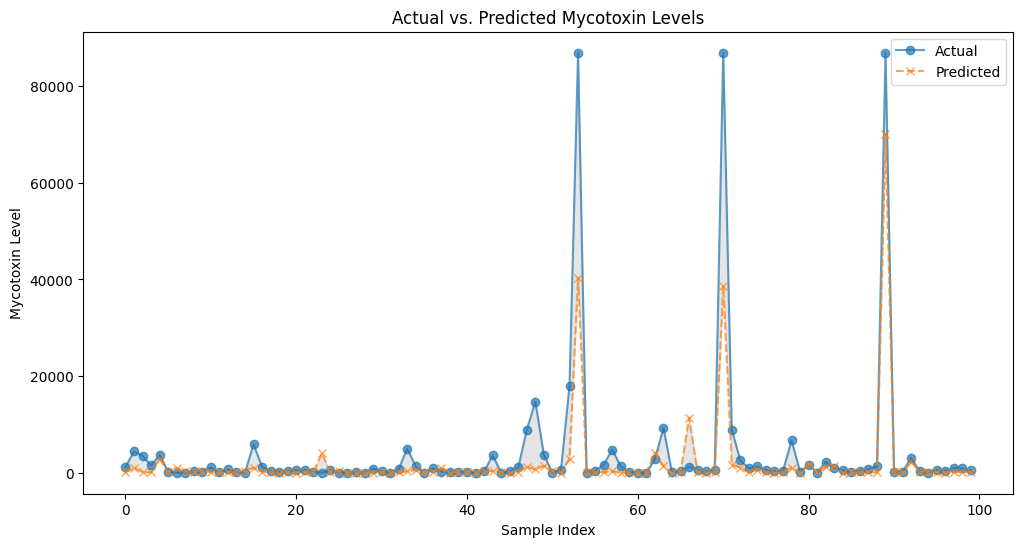

In [66]:
#Training the data on best parameter we found
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ✅ Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ✅ Data Preprocessing
def preprocess_data(df_pca):
    df_pca["target_log"] = np.log1p(df_pca["target"])  # Log transform to stabilize variance

    lower, upper = df_pca["target_log"].quantile([0.01, 0.99])
    df_pca["target_capped"] = np.clip(df_pca["target_log"], lower, upper)

    scaler = MinMaxScaler()
    df_pca["target_scaled"] = scaler.fit_transform(df_pca["target_capped"].values.reshape(-1, 1))

    X = df_pca[['PC1', 'PC2', 'PC3']]
    y = df_pca["target_scaled"]

    feature_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42), scaler

(df_pca_train, df_pca_test, y_train, y_test), scaler = preprocess_data(df_pca)

# ✅ Define the ANN Model with Best Hyperparameters
def build_ann_model():
    model = Sequential()
    model.add(Dense(96, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_shape=(df_pca_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))  # Best dropout1
    model.add(Dense(1, activation='softplus'))  # Softplus to avoid negative predictions

    model.compile(optimizer=AdamW(learning_rate=0.001397), loss="mse", metrics=["mae"])
    return model

# ✅ Train the Model
model = build_ann_model()
history = model.fit(df_pca_train, y_train, epochs=100, batch_size=16, validation_data=(df_pca_test, y_test), verbose=1)

# ✅ Predictions
y_pred_scaled = model.predict(df_pca_test).reshape(-1)

# Convert Predictions Back to Original Scale
y_test_scaled = y_test.values.reshape(-1, 1)
y_pred_log = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_log = scaler.inverse_transform(y_test_scaled)

y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

df_comparison = pd.DataFrame({"Actual": y_test_original.flatten(), "Predicted": y_pred_original.flatten()})
print(df_comparison.head())

# ✅ Calculate Metrics
rmse = np.sqrt(mean_squared_error(df_comparison["Actual"], df_comparison["Predicted"]))
mae = mean_absolute_error(df_comparison["Actual"], df_comparison["Predicted"])
r2 = r2_score(df_comparison["Actual"], df_comparison["Predicted"])

print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

# ✅ Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(df_comparison["Actual"], label="Actual", marker="o", linestyle="-", alpha=0.7)
plt.plot(df_comparison["Predicted"], label="Predicted", marker="x", linestyle="--", alpha=0.7)
plt.fill_between(range(len(df_comparison)), df_comparison["Actual"], df_comparison["Predicted"], color='gray', alpha=0.2)
plt.xlabel("Sample Index")
plt.ylabel("Mycotoxin Level")
plt.title("Actual vs. Predicted Mycotoxin Levels")
plt.legend()
plt.show()



In [35]:
#used boosting technique xgboost with hyperparameter to do prediction
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def preprocess_data(df_pca):
    df_pca["target_log"] = np.log1p(df_pca["target"])

    lower_bound = df_pca["target_log"].quantile(0.01)
    upper_bound = df_pca["target_log"].quantile(0.99)
    df_pca["target_capped"] = np.clip(df_pca["target_log"], lower_bound, upper_bound)

    if df_pca["target_capped"].min() < 0:
        shift_value = abs(df_pca["target_capped"].min()) + 1e-6
        df_pca["target_capped"] += shift_value

    scaler = MinMaxScaler()
    df_pca["target_scaled"] = scaler.fit_transform(df_pca["target_capped"].values.reshape(-1, 1))

    X = df_pca[['PC1', 'PC2', 'PC3']]
    y = df_pca["target_scaled"]

    feature_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42), scaler

# Prepare data
(df_pca_train, df_pca_test, y_train, y_test), scaler = preprocess_data(df_pca)

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1.0],
    "reg_lambda": [0, 0.1, 1.0],
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(df_pca_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print(f"🔥 Best Hyperparameters: {best_params}")

# Train final model with best hyperparameters
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(df_pca_train, y_train)

# Make Predictions
y_pred_scaled = best_xgb.predict(df_pca_test).reshape(-1, 1)
y_test_scaled = y_test.values.reshape(-1, 1)

# Undo MinMax Scaling
y_pred_log = scaler.inverse_transform(y_pred_scaled)
y_test_log = scaler.inverse_transform(y_test_scaled)

# Undo Log Transformation
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

# Create DataFrame for Comparison
df_comparison = pd.DataFrame({
    "Actual": y_test_original.flatten(),
    "Predicted": y_pred_original.flatten()
})
print(df_comparison.head())

# Performance Metrics
rmse = np.sqrt(mean_squared_error(df_comparison["Actual"], df_comparison["Predicted"]))
mae = mean_absolute_error(df_comparison["Actual"], df_comparison["Predicted"])
r2 = r2_score(df_comparison["Actual"], df_comparison["Predicted"])

print(f"🚀 RMSE: {rmse:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📊 R² Score: {r2:.4f}")



Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

In [ ]:
!pip install optuna

In [ ]:
## Plot Actual vs. Predicted values for better visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, marker='o', linestyle='-', label="Actual", color='steelblue')
plt.plot(y_pred_original, marker='x', linestyle='--', label="Predicted", color='darkorange')

plt.xlabel("Sample Index")
plt.ylabel("Mycotoxin Levels")
plt.title("Actual vs. Predicted Mycotoxin Levels")
plt.legend()
plt.grid(True)
plt.show()


In [67]:
import pickle

 Save the output scaler
with open("output_scaler.pkl", "wb") as f:
   pickle.dump(scaler, f)#save the standard scaler used to standardize target feature

# Save the trained model
best_model.save("model.h5")#save the model we got
